In [7]:
import os
import librosa
import numpy as np
import tqdm
import subprocess
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display
%matplotlib inline

In [3]:
feature_dim_1 = 20
feature_dim_2 = 15
channel = 1
epochs = 100
batch_size = 100
verbose = 1
num_classes = 19 #categories

In [53]:
def wav2mfcc(file_path, max_pad_len=feature_dim_2):
    wave, sr = librosa.load(file_path, mono=True, sr=None)
    wave = wave[::3]
    mfcc = librosa.feature.mfcc(wave, sr=16000)
    pad_width = max_pad_len - mfcc.shape[1]
    mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    #print(mfcc.shape)
    return mfcc

def calculate_Mel_LogSpectrum_Mfcc(file_path,sampleRate = 16000):
    max_pad_len = 15
    samples, sample_rate = librosa.load(file_path)
    S = librosa.feature.melspectrogram(samples, sr=16000, n_mels=128)
    # Convert to log scale (dB). We'll use the peak power (max) as reference.
    log_S = librosa.power_to_db(S, ref=np.max)
    mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=21)
    return S, log_S, mfcc
    #print("mfcc.shape[1] is {}".format(mfcc.))
    #pad_width = max_pad_len - mfcc.shape[1]
    #mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    
    
def Draw_MelSpectrogram_LogS_MFCC(wavfilePath,samplerate=16000):
    _melspectrum, _log_s, _mfcc =  calculate_Mel_LogSpectrum_Mfcc(wavfilePath)
    delta2_mfcc = librosa.feature.delta(_mfcc, order=2)
    print("delta2_mfcc shape is {}".format(delta2_mfcc.shape))
    #Draw MelSpectrogram
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(_log_s, sr=samplerate, x_axis='time', y_axis='mel')
    plt.title('Mel power spectrogram ')
    plt.colorbar(format='%+02.0f dB')
    plt.tight_layout()
    #Draw MFCC
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(delta2_mfcc)
    plt.ylabel('MFCC coeffs')
    plt.xlabel('Time')
    plt.title('MFCC')
    plt.colorbar()
    plt.tight_layout()
    print("mfcc shape is : {}".format(_mfcc.shape))
    
def drawNpy(npyFile):
    img_array = np.load('filename.npy')
    plt.imshow(img_array,cmap='grey')
    plt.show()

delta2_mfcc shape is (21, 44)
mfcc shape is : (21, 44)
delta2_mfcc shape is (21, 44)
mfcc shape is : (21, 44)


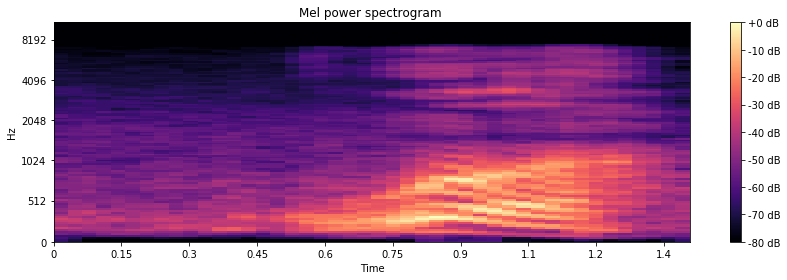

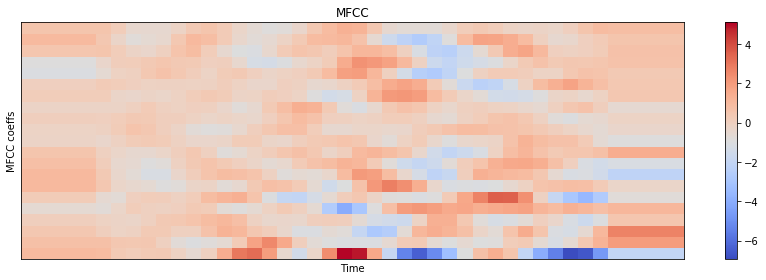

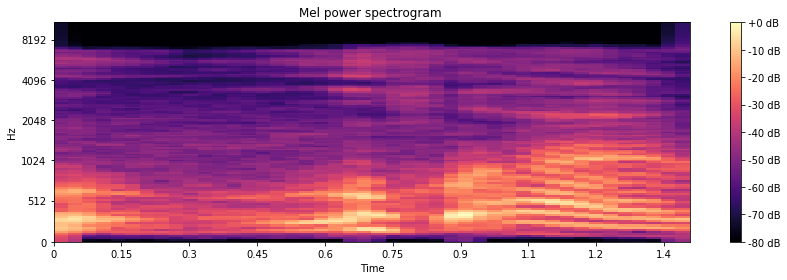

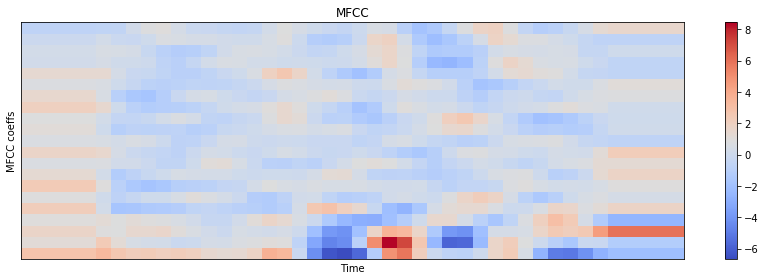

In [54]:
sun_test_file_path1 = "../DysSpeech_Corpora/DrSun/filtered_train_wavfiles/1/DrSun0822_4711_0_rec.wav"
sun_test_file_path2 = "../DysSpeech_Corpora/DrSun/filtered_train_wavfiles/1/DrSun0822_4711_1_rec.wav"
sun_test_file_path3 = "../DysSpeech_Corpora/DrSun/filtered_train_wavfiles/1/DrSun0822_4711_2_rec.wav"
sun_test_file_path4 = "../DysSpeech_Corpora/DrSun/filtered_train_wavfiles/1/DrSun0822_4711_3_rec.wav"
sun_test_file_path5 = "../DysSpeech_Corpora/DrSun/filtered_train_wavfiles/1/DrSun0822_4711_4_rec.wav"
sun_test_file_path6 = "../DysSpeech_Corpora/DrSun/filtered_train_wavfiles/1/DrSun0822_4711_5_rec.wav"
#sun_test_file_path7 = "../DysSpeech_Corpora/DrSun/filtered_train_wavfiles/1/DrSun0822_4711_6_rec.wav"
#sun_test_file_path8 = "../DysSpeech_Corpora/DrSun/filtered_train_wavfiles/1/DrSun0822_4711_7_rec.wav"
#calculateMFCC(sun_test_file_path)
#wav2mfcc(sun_test_file_path)
Draw_MelSpectrogram_LogS_MFCC(sun_test_file_path)
Draw_MelSpectrogram_LogS_MFCC(sun_test_file_path2)

In [66]:
def output_spectrum_info(specData):
    print("Spectrum is type of {}".format(type(specData)))
    print("Spectrum shape is {}".format(specData.shape))
    
def save_mfcc_to_array(mfccData):
    pass
    
def save_mels_to_array(melsData,targetPath):
    pass

In [67]:
_melspectrum, _log_s, _mfcc =  calculate_Mel_LogSpectrum_Mfcc(sun_test_file_path1)
delta2_mfcc_ = librosa.feature.delta(_mfcc, order=2)
output_spectrum_info(delta2_mfcc_)

Spectrum is type of <class 'numpy.ndarray'>
Spectrum shape is (21, 44)


# Spectrum calculation

In [8]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)